In [50]:
import numpy as np
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd
import pandas
from pandas.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.model_selection import KFold, cross_val_score
from sklearn import cross_validation  
from urllib.request import urlopen 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as pt


# Scatterplot Matrix
import matplotlib.pyplot as plt





plt.style.use('ggplot')
pt.set_credentials_file(username='jd561996972', api_key='vf5PtJgDkPaRcRExwqbn')

In [51]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
np.set_printoptions(threshold=np.nan) #see a whole array when we output it

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names) #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names) #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names) #gets Switzerland data
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease] #combines all arrays into a list
#heartDisease=pd.read_csv('heart-statlog.csv',names=names)
heartDisease = pd.concat(datatemp)
#combines list into one array




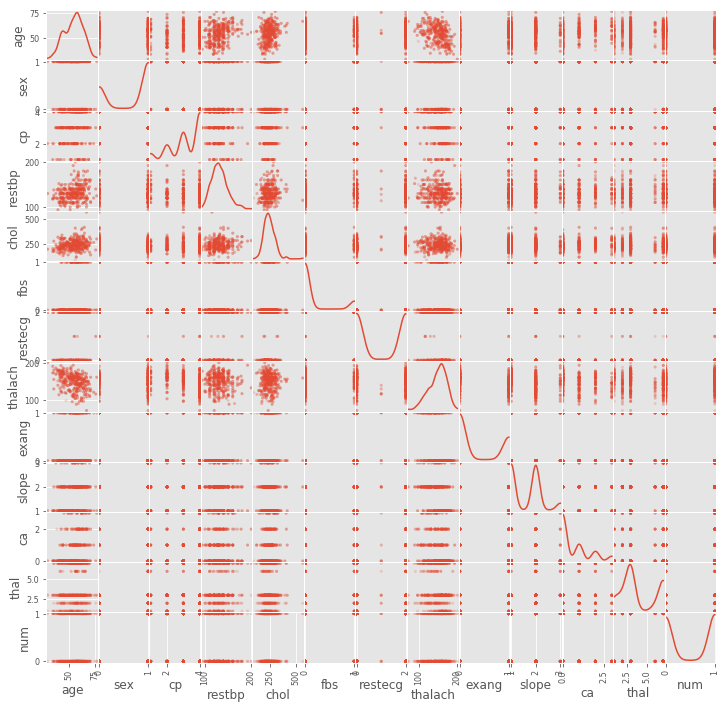

In [52]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "slope", "ca", "thal", "num"]
df0 = pd.read_table("heart-statlog.csv", sep=',', header=None, names=columns)
df0.head()
scatter_matrix(df0,alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

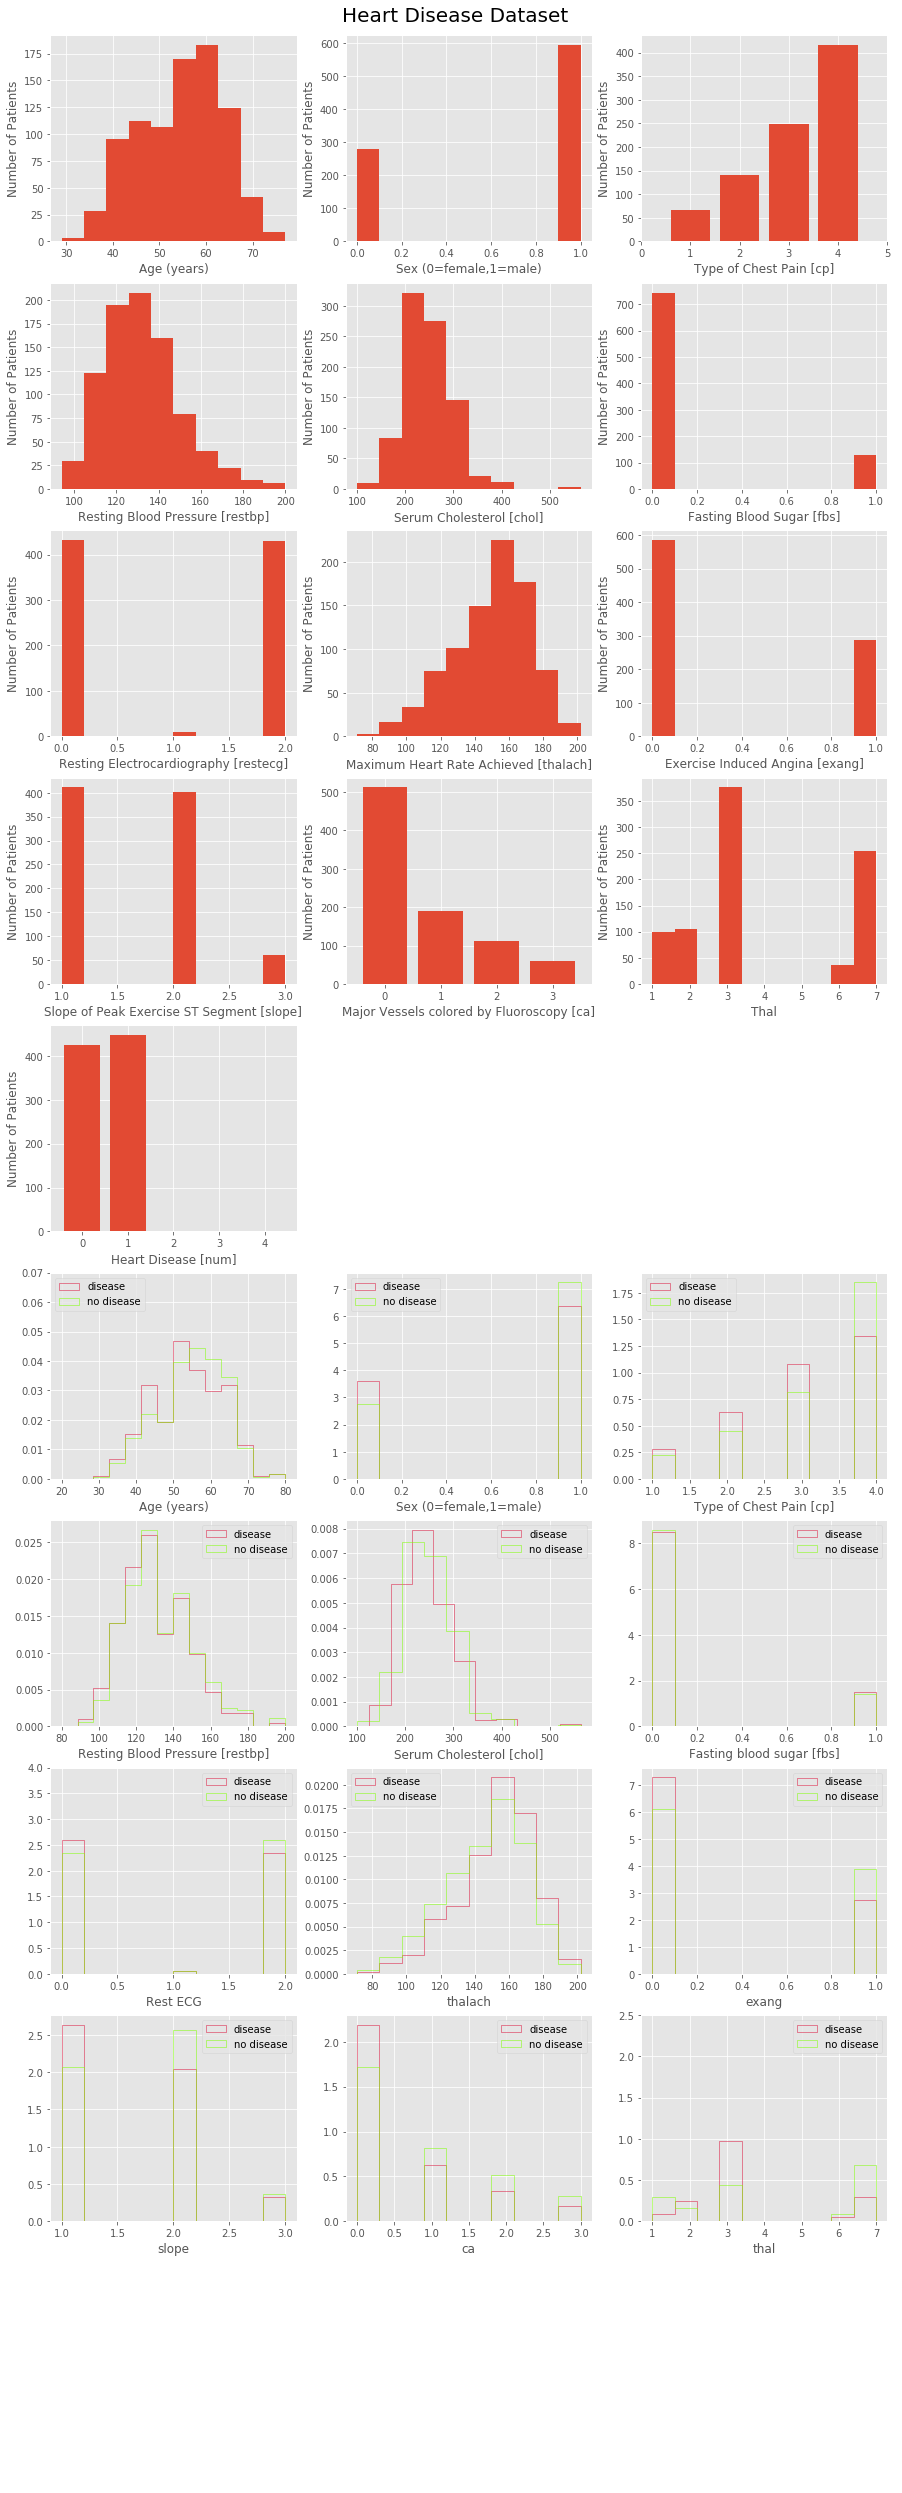

In [53]:

fig, axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Dataset", fontsize=20)
axes[0,0].hist(df0.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df0.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df0.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")

axes[1,0].hist(df0.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df0.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df0.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df0.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df0.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df0.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")

axes[3,0].hist(df0.slope)
axes[3,0].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df0.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,1].set_xlim(-0.7,3.7)
axes[3,1].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df0.thal)
axes[3,2].set_xlabel("Thal")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df0.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,0].set_xlim(-0.7,4.7)
axes[4,0].set_xlabel("Heart Disease [num]")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].axis("off")
axes[4,2].axis("off")

#Marginal Feature Distribution comapared for disease and not-disease
bins = np.linspace(20, 80, 15)
axes[5,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,0].set_xlabel("Age (years)")
axes[5,0].set_ylim(0.0,0.070)
axes[5,0].legend(prop={'size': 10},loc="upper left")
axes[5,1].hist(df0[df0.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,1].hist(df0[df0.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,1].set_xlabel("Sex (0=female,1=male)")
axes[5,1].legend(prop={'size': 10},loc="upper left")
axes[5,2].hist(df0[df0.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,2].hist(df0[df0.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,2].set_xlabel("Type of Chest Pain [cp]")
axes[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[6,0].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,0].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[6,0].legend(prop={'size': 10},loc="upper right")
axes[6,1].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,1].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,1].set_xlabel("Serum Cholesterol [chol]")
axes[6,1].legend(prop={'size': 10},loc="upper right")
axes[6,2].hist(df0[df0.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,2].hist(df0[df0.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,2].set_xlabel("Fasting blood sugar [fbs]")
axes[6,2].legend(prop={'size': 10},loc="upper right")
axes[7,0].hist(df0[df0.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,0].hist(df0[df0.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,0].set_xlabel("Rest ECG")
axes[7,0].set_ylim(0.0,4.0)
axes[7,0].legend(prop={'size': 10},loc="upper right")
axes[7,1].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,1].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,1].set_xlabel("thalach")
axes[7,1].legend(prop={'size': 10},loc="upper left")
axes[7,2].hist(df0[df0.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,2].hist(df0[df0.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,2].set_xlabel("exang")
axes[7,2].legend(prop={'size': 10},loc="upper right")

axes[8,0].hist(df0[df0.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,0].hist(df0[df0.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,0].set_xlabel("slope")
axes[8,0].legend(prop={'size': 10},loc="upper right")
axes[8,1].hist(df0[df0.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,1].hist(df0[df0.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,1].set_xlabel("ca")
axes[8,1].legend(prop={'size': 10},loc="upper right")
axes[8,2].hist(df0[df0.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,2].hist(df0[df0.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,2].set_xlabel("thal")
axes[8,2].set_ylim(0.0,2.5)
axes[8,2].legend(prop={'size': 10},loc="upper right")

axes[9,0].axis("off")
axes[9,1].axis("off")
axes[9,2].axis("off")

plt.show()

#### del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']

heartDisease = heartDisease.replace('?', np.nan)
heartDisease.dtypes

In [30]:
count = 0
for item in heartDisease:
    for i in heartDisease[item]:
        count += (i == '?')
        
def classImbalance(item):
    item_0 = 0
    item_1 = 0
    item_2 = 0
    item_3 = 0
    item_4 = 0
    item_5 = 0
    for item_i in heartDisease[item]:
        for i in range(0,6):
            if (item == i):
                item_i +=1
    heartDisease_i = 0
    for i in  range (0,6):
        heartDisease_i = (item_i/len(heartDisease)) * 100
        print("The percentage of level", i, "in the response variable is: {0:.2f}".format(heartDisease_i)) 

classImbalance('heartdisease')

The percentage of level 0 in the response variable is: 0.14
The percentage of level 1 in the response variable is: 0.14
The percentage of level 2 in the response variable is: 0.14
The percentage of level 3 in the response variable is: 0.14
The percentage of level 4 in the response variable is: 0.14
The percentage of level 5 in the response variable is: 0.14


In [31]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)


In [32]:
for item in heartDisease: #converts everything to floats
    heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak'] #columns to normalize
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,0.000000,1,0.333333,0.416667,0.218905,0.0,2.0,0.961538,0.0,0.342105,0
1,0.021739,1,0.333333,0.333333,0.402985,0.0,0.0,0.769231,0.0,0.342105,0
3,0.043478,0,0.000000,0.750000,0.393035,0.0,1.0,0.846154,0.0,0.342105,0
4,0.065217,0,0.333333,0.166667,0.363184,0.0,1.0,0.692308,0.0,0.342105,0
5,0.086957,0,0.333333,0.208333,0.328358,0.0,0.0,0.807692,0.0,0.342105,0


In [33]:
for i in range(1,5):
    heartDisease['heartdisease'] = heartDisease['heartdisease'].replace(i,1)

In [34]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

In [35]:
train, test = train_test_split(heartDisease, test_size = 0.20, random_state = 42)
# Create the training test omitting the diagnosis

training_set = train.ix[:, train.columns != 'heartdisease']
# Next we create the class set 
class_set = train.ix[:, train.columns == 'heartdisease']

# Next we create the test set doing the same process as the training set
test_set = test.ix[:, test.columns != 'heartdisease']
test_class_set = test.ix[:, test.columns == 'heartdisease']

c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [36]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang' ]], train['heartdisease'])
predictions_dt = dt.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang' ]])
predictright = 0
predictions_dt.shape[0]
for i in range(0,predictions_dt.shape[0]-1):
    if (predictions_dt[i]== test.iloc[i][10]):
        predictright +=1
accuracy = predictright/predictions_dt.shape[0]
accuracy

0.9473684210526315

In [37]:
print("Table comparing actual vs. predicted values for our test set:\n",
     confusion_matrix(predictions_dt, test_class_set['heartdisease'])
                 )
print ("Accuracy : ",
    accuracy_score(predictions_dt, test_class_set['heartdisease'])*100)
     
print("Report:",
classification_report(predictions_dt, test_class_set['heartdisease']))
fpr2, tpr2, _ = roc_curve(predictions_dt, test_class_set)

#AUC curve calcuation
auc_dt = auc(fpr2, tpr2)

Table comparing actual vs. predicted values for our test set:
 [[64  5]
 [ 0 45]]
Accuracy :  95.6140350877193
Report:              precision    recall  f1-score   support

          0       1.00      0.93      0.96        69
          1       0.90      1.00      0.95        45

avg / total       0.96      0.96      0.96       114



In [38]:
fitRF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
fitRF.fit(training_set, class_set['heartdisease'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
importancesRF = fitRF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF
namesInd = names[:11]
print("Feature ranking:")

for f in range(10):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indicesRF[i]], importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'cp' has a Gini Importance of 0.195424
2. The feature 'exang' has a Gini Importance of 0.165684
3. The feature 'oldpeak' has a Gini Importance of 0.152049
4. The feature 'chol' has a Gini Importance of 0.143879
5. The feature 'thalach' has a Gini Importance of 0.118047
6. The feature 'age' has a Gini Importance of 0.083195
7. The feature 'trestbps' has a Gini Importance of 0.072504
8. The feature 'sex' has a Gini Importance of 0.035457
9. The feature 'restecg' has a Gini Importance of 0.020557
10. The feature 'fbs' has a Gini Importance of 0.013205


c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



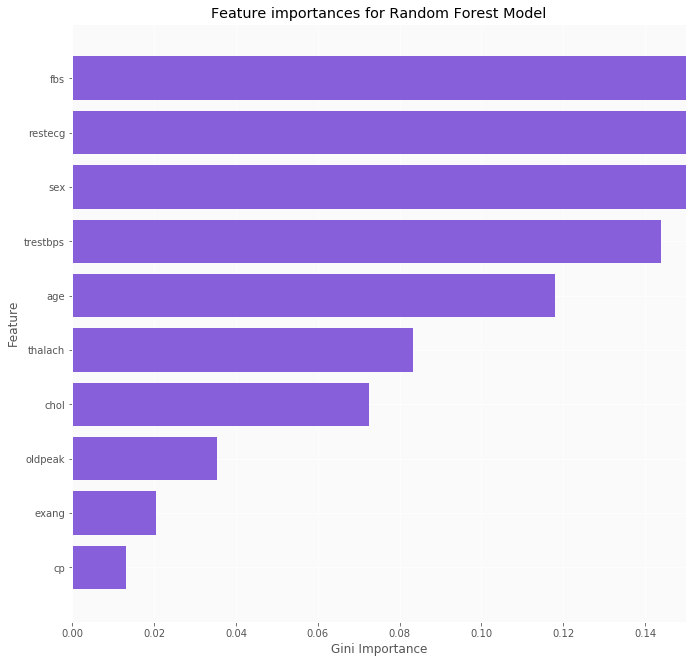

In [40]:
feature_space = []
for i in range(9, -1, -1):
    feature_space.append(namesInd[indicesRF[i]])
indRf = sorted(importancesRF) #sort into decreasing order 
index = np.arange(10) #arrange the importance

f, ax = plt.subplots(figsize=(11, 11))

ax.set_axis_bgcolor('#fafafa')
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')
plt.yticks(index, ('cp', 'exang', 'oldpeak', 'chol', 'thalach', 'age', 'trestbps', 'sex', 'restecg', 'fbs'))
plt.ylim(-1, 10)
plt.xlim(0, 0.15)
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

plt.show()

In [41]:
predictions_RF = fitRF.predict(test_set)
print(pd.crosstab(predictions_RF, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))
print ("Accuracy : ",
    accuracy_score(predictions_RF, test_class_set['heartdisease'])*100)
     
print("Report:",
classification_report(predictions_RF, test_class_set['heartdisease']))
#ROC curve calculation
fpr1, tpr1, _ = roc_curve(predictions_RF, test_class_set)
#AUC curve calcuation
auc_rf = auc(fpr1, tpr1)

Actual Values      0   1
Predicted Values        
0                 64   4
1                  0  46
Accuracy :  96.49122807017544
Report:              precision    recall  f1-score   support

          0       1.00      0.94      0.97        68
          1       0.92      1.00      0.96        46

avg / total       0.97      0.96      0.97       114



In [42]:
svmtest = svm.SVC()
svmfit = svmtest.fit(train[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']], train['heartdisease'])
svmPredictions = svmtest.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
predictrightsvm = 0
for i in range(0,svmPredictions.shape[0]-1):
    if (svmPredictions[i]== test.iloc[i][10]):
        predictrightsvm +=1
rightpercentsvm = predictrightsvm/svmPredictions.shape[0]
rightpercentsvm

0.7280701754385965

In [43]:
predictions_svm = svmfit.predict(test_set)
print(pd.crosstab(predictions_svm, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))
print ("Accuracy : ",
    accuracy_score(predictions_svm, test_class_set['heartdisease'])*100)
     
print("Report:",
classification_report(predictions_svm, test_class_set['heartdisease']))

Actual Values      0   1
Predicted Values        
0                 54  20
1                 10  30
Accuracy :  73.68421052631578
Report:              precision    recall  f1-score   support

          0       0.84      0.73      0.78        74
          1       0.60      0.75      0.67        40

avg / total       0.76      0.74      0.74       114



In [44]:
#ROC curve calculation
fpr4, tpr4, _ = roc_curve(predictions_svm, test_class_set)
#AUC curve calcuation
auc_svm = auc(fpr4, tpr4)

In [45]:
heartDiseaseKnn = KNeighborsClassifier(n_neighbors=10)
heartDiseaseKnn.fit(training_set, class_set['heartdisease'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
# We predict the class for our training set
predictionsTrain = heartDiseaseKnn.predict(training_set) 

# Here we create a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictionsTrain, class_set['heartdisease'], 
                  rownames=['Predicted Values'], colnames=['Actual Values']))

# Measure the accuracy based on the trianing set
accuracyTrain = heartDiseaseKnn.score(training_set, class_set['heartdisease'])

print("Here is our accuracy for our training set:")
print('%.3f' % (accuracyTrain * 100), '%')



Actual Values       0    1
Predicted Values          
0                 246   69
1                  17  122
Here is our accuracy for our training set:
81.057 %


In [47]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.3f' % (train_error_rate * 100), '%')

The train error rate for our model is:
18.943 %


In [48]:
# First we predict the Dx for the test set and call it predictions
predictions = heartDiseaseKnn.predict(test_set)

# Let's compare the predictions vs. the actual values
print(pd.crosstab(predictions, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

# Let's get the accuracy of our test set
accuracy = heartDiseaseKnn.score(test_set, test_class_set['heartdisease'])

# TEST ERROR RATE!!
print("Here is our accuracy for our test set:")
print('%.3f' % (accuracy * 100), '%')
print ("Accuracy : ",
    accuracy_score(predictions, test_class_set['heartdisease'])*100)
     
print("Report:",
classification_report(predictions, test_class_set['heartdisease']))

Actual Values      0   1
Predicted Values        
0                 55  21
1                  9  29
Here is our accuracy for our test set:
73.684 %
Accuracy :  73.68421052631578
Report:              precision    recall  f1-score   support

          0       0.86      0.72      0.79        76
          1       0.58      0.76      0.66        38

avg / total       0.77      0.74      0.74       114



In [49]:
n = KFold(n_splits=3)

scores = cross_val_score(heartDiseaseKnn, 
                         test_set, 
                         test_class_set['heartdisease'], cv = n)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

fpr3, tpr3, _ = roc_curve(predictions, test_class_set)
auc_knn = auc(fpr3, tpr3)


Accuracy: 0.75 (+/- 0.03)


c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning:

The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



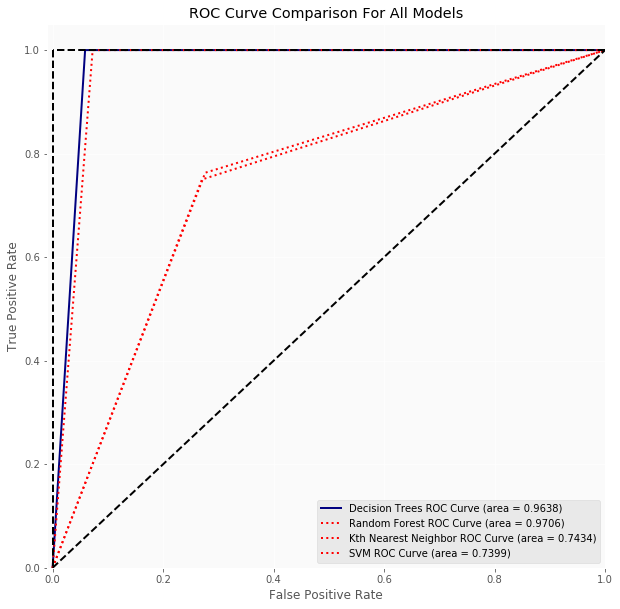

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve (area = %.4f)' % auc_dt, 
         color = 'navy', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve (area = %.4f)' % auc_rf, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr3, tpr3,label='Kth Nearest Neighbor ROC Curve (area = %.4f)' % auc_knn, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr4, tpr4,label='SVM ROC Curve (area = %.4f)' % auc_svm, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)

ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()